&emsp;&emsp;最近工作需要爬取了较多网站，遇到比较头疼的是处理验证码，开始使用Python的pytesseract库，但是识别效果不是很好，于是决定自己手撸一个验证码识别库。

In [2]:
from captcha.image import ImageCaptcha
from PIL import Image
import numpy as np
import random
import string

class generateCaptcha():
    def __init__(self,
                 width = 160,#验证码图片的宽
                 height = 60,#验证码图片的高
                 char_num = 4,#验证码字符个数
                 characters = string.digits + string.ascii_uppercase + string.ascii_lowercase):#验证码组成，数字+大写字母+小写字母
        self.width = width
        self.height = height
        self.char_num = char_num
        self.characters = characters
        self.classes = len(characters)

    def gen_captcha(self,batch_size = 50):
        X = np.zeros([batch_size,self.height,self.width,1])
        img = np.zeros((self.height,self.width),dtype=np.uint8)
        Y = np.zeros([batch_size,self.char_num,self.classes])
        image = ImageCaptcha(width = self.width,height = self.height)

        while True:
            for i in range(batch_size):
                
                captcha_str = ''.join(random.sample(self.characters,self.char_num))
                img = image.generate_image(captcha_str).convert('L')
                img = np.array(img.getdata())
                X[i] = np.reshape(img,[self.height,self.width,1])/255.0
                for j,ch in enumerate(captcha_str):
                    Y[i,j,self.characters.find(ch)] = 1 
            Y = np.reshape(Y,(batch_size,self.char_num*self.classes))
            yield X,Y

    def decode_captcha(self,y):
        y = np.reshape(y,(len(y),self.char_num,self.classes))
        return ''.join(self.characters[x] for x in np.argmax(y,axis = 2)[0,:])

    def get_parameter(self):
        return self.width,self.height,self.char_num,self.characters,self.classes


In [3]:
gc = generateCaptcha()

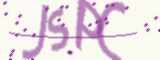

In [6]:
from captcha.image import ImageCaptcha
import random
import string

image = ImageCaptcha(160,60)    # 图片宽 160 高 60
characters = string.digits + string.ascii_uppercase + string.ascii_lowercase        #验证码组成，数字+大写字母+小写字母
char_num = 4 #验证码字符个数

captcha_str = ''.join(random.sample(characters, char_num))
img = image.generate_image(captcha_str)
img

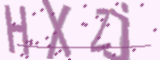

In [10]:
img

# 目标API

+ https://www.rclgroup.com/admin/CommonCx/captcha/captcha.jpg?v=2050

+ https://www.shipmentlink.com//servlet/TUF1_CaptchaUtils?d=1589938414501
 

In [7]:
!ls

Captcha.ipynb	   CIFAR10-Tensorflow.ipynb  README.md
chinese-ocr	   DeliverySpider.ipynb      TensorFlow-2.x-Tutorials
CifaData	   jupyter-cmd.md
CIFAR100_tutorial  models
